# (Intro to) convolutional neural networks (CNN)

In [1]:
%pylab inline
from tensorflow.keras.datasets import mnist

Populating the interactive namespace from numpy and matplotlib


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.astype('float64') 
x_test=x_test.astype('float64')

In [3]:
poka = lambda x : imshow(x, cmap=cm.gist_gray_r)

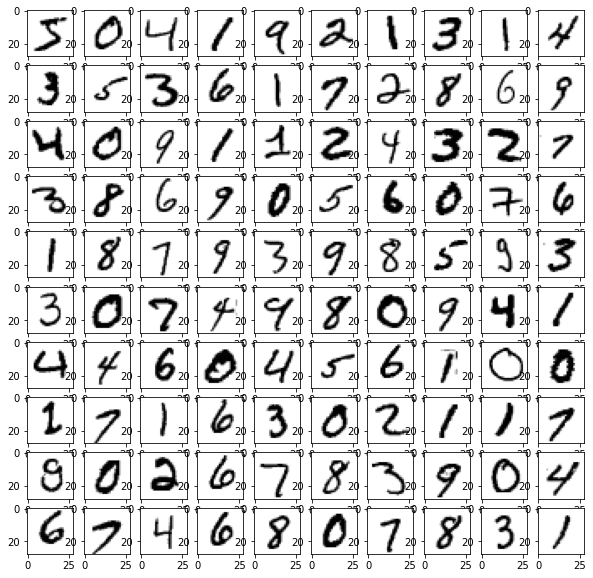

In [4]:
figsize(10,10)
for i in range(100):
    subplot(10,10,i+1)
    poka(x_train[i])

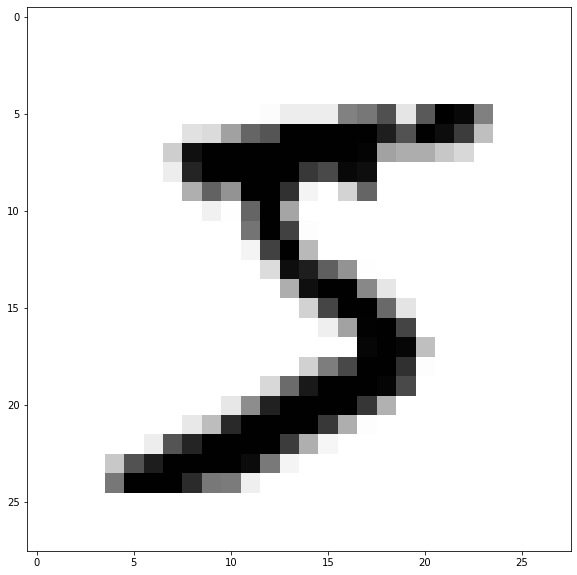

In [5]:
im=x_train[0]
poka(im)

# Próbkowanie

In [6]:
def overlapping_regions(image, n):
    w, h = image.shape
    for x in range(w-n+1):
        for y in range(h-n+1):
            yield image[x:x+n, y:y+n], x, y

In [7]:
def nonoverlapping_regions(image, n):
    w, h = image.shape
    for i in range(0,h,n):
        for j in range(0,w,n):
            yield image[i:i+n,j:j+n], i, j  

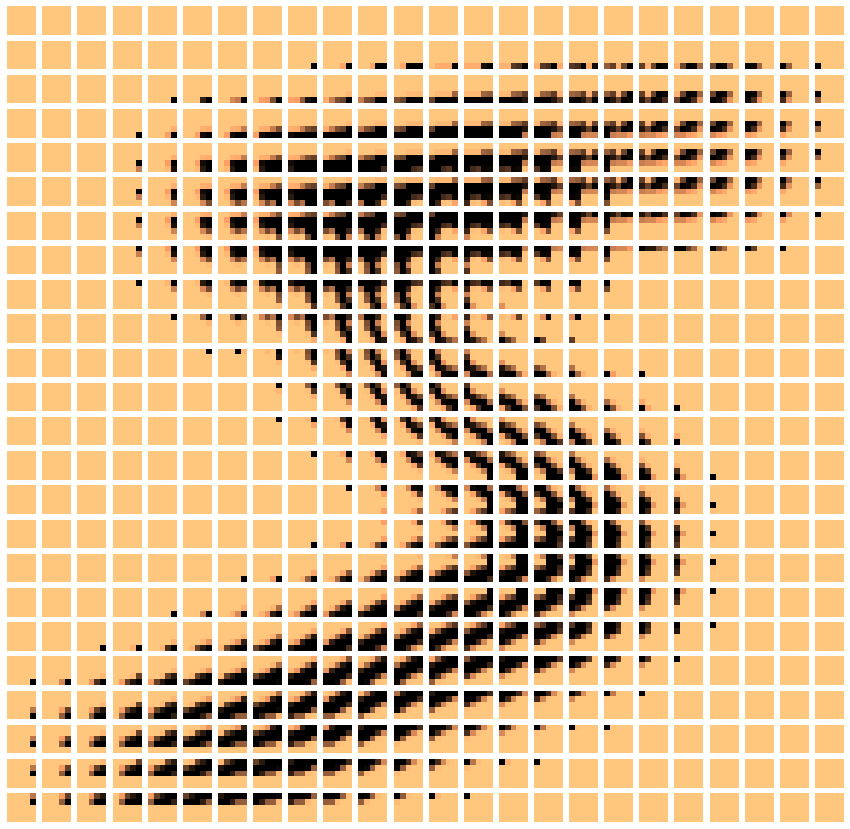

In [8]:
figsize(15,15)
window_size=5
L=im.shape[0]-2*(window_size//2)
k=1
for reg, i, j in overlapping_regions(im, window_size):
    subplot(L,L,k)
    imshow(reg, cmap=cm.copper_r)
    axis('off')
    k+=1

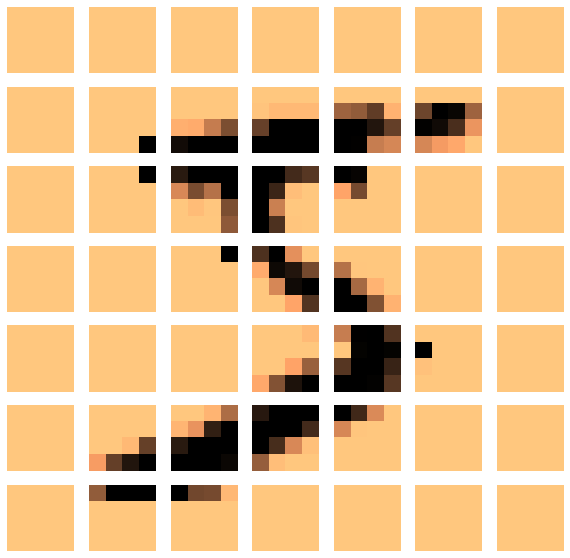

In [9]:
figsize(10,10)
window_size=4
L=im.shape[0]//window_size
k=1
for reg, i, j in nonoverlapping_regions(im, window_size):
    subplot(L,L,k)
    imshow(reg, cmap=cm.copper_r)
#     imshow(reg, cmap=cm.gray_r)
#     imshow(reg)
    
    axis('off')
    k+=1

# Wykrywanie cech (filtrowanie splotowe)

In [10]:
filters=array([
    [
        # krawędzie pionowe prawe
        [-1,1,0],
        [-1,1,0],
        [-1,1,0]
    ],
    [
        # krawędzie pionowe lewe
        [1,-1,0],
        [1,-1,0],
        [1,-1,0]
    ],
    [
        [-1, -1, -1],
        [ 1,  1,  1],
        [ 0,  0,  0]],
    [
        [ 1,  1,  1],
        [-1, -1, -1],
        [ 0,  0,  0]]
])

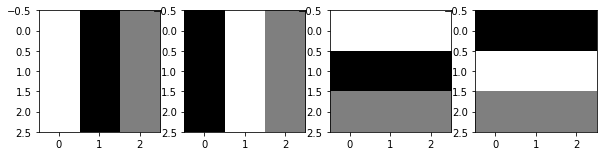

In [11]:
i=1
for f in filters:
    subplot(1,filters.shape[0],i)
    poka(f)
    i+=1

In [12]:
def conv(image, kernel):
    n=kernel.shape[0]
    w, h = image.shape
    result=zeros((w-n+1, h-n+1))
    for reg, i, j in overlapping_regions(image, n):
        result[i,j]=sum(reg*kernel)
    return result

In [13]:
# from scipy.ndimage.filters import convolve
# def conv(image, kernel):
#     edge=(kernel.shape[0]-1)//2  # obcina krawędź
#     return convolve(image, kernel, mode='constant', cval=0)[edge:-edge,edge:-edge]

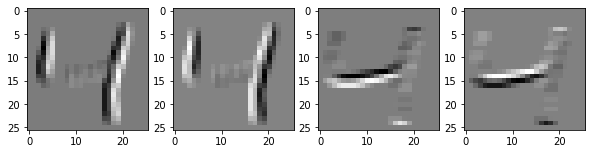

In [14]:
im=x_train[2]
figsize(10,10)
f_num=filters.shape[0]
for f in range(f_num):
    c_im = conv(im, filters[f])
    subplot(1,f_num,f+1) 
    poka(c_im);

In [15]:
im.shape, c_im.shape

((28, 28), (26, 26))

# Wzmocnienie

In [16]:
# funkcja aktywacji (Rectified Linear Unit)
def relu(x):
    return maximum(x,0)

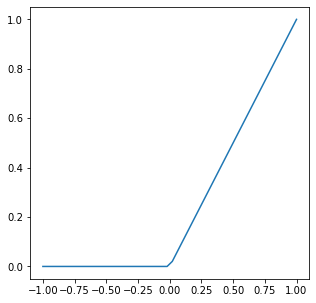

In [17]:
x=linspace(-1,1)
figsize(5,5)
plot(x,relu(x));

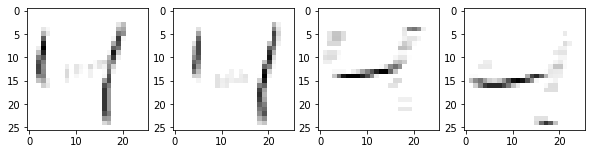

In [18]:
im=x_train[2]
figsize(10,10)
f_num=filters.shape[0]
for f in range(f_num):
    c_im = relu(conv(im, filters[f]))
    subplot(1,f_num,f+1) 
    poka(c_im);

# Kompresja (downsampling)

In [19]:
def maxpooling(image, n):
    w, h = image.shape
    nw, nh = int(ceil(w/n)), int(ceil(h/n))
    result=zeros(nw*nh)
    k=0
    for reg, i, j in nonoverlapping_regions(image, n):
        result[k]=reg.max()
        k+=1       
    return result.reshape(nw, nh)

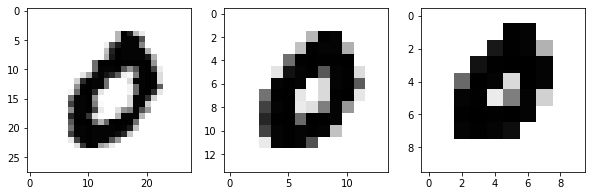

In [20]:
im=x_train[37]
subplot(131)
poka(im)
subplot(132)
poka(maxpooling(im,2))
subplot(133)
poka(maxpooling(im,3))

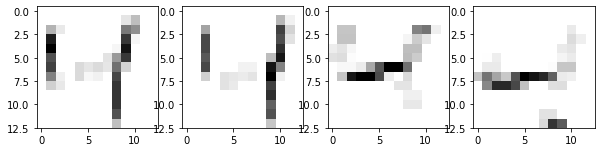

In [21]:
im=x_train[2]
figsize(10,10)
f_num=filters.shape[0]
for f in range(f_num):
    c_im = maxpooling(relu(conv(im, filters[f])),2)
    subplot(1,f_num,f+1) 
    poka(c_im);

# Spłaszczenie

In [22]:
im.shape, im.flatten().shape

((28, 28), (784,))